In [1]:
%pip install -q ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext autoreload
%autoreload now
import tempo_embeddings
import ipywidgets as widgets

#### Connect to Existing Database

In [3]:
from tempo_embeddings.embeddings.vector_database import ChromaDatabaseManager

db = ChromaDatabaseManager(db_path="testing_db", batch_size=24)
db.connect()

/Users/jose/Repos/tempo-embeddings/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


#### Choose from Existing Collections in the DB

In [4]:
existing_colls = db.get_available_collections()
collection_selector = widgets.Dropdown(
    options=existing_colls,
    description='Collection:',
    disabled=False,
)
collection_selector

Dropdown(description='Collection:', options=('anp_sg_corpus', 'anp_duurzam'), value='anp_sg_corpus')

#### Analyze collections

Number of records in collections:

In [5]:
collection = db.get_existing_collection(collection_selector.value)
print(collection.count())

Retrieved existing collection 'anp_sg_corpus'
1528


Plot records by metadata

In [6]:
corpus = db.get_corpus(collection)
df = corpus.to_dataframe()

print(f"Data Shape = {df.shape}")
df.head()

Data Shape = (1528, 14)


,ID_DB,text,,RecId,chamber,date,highlighting,speakers,title,year,day,filename,issue,month
0,0082a85b0448b270e3797a5cf1e6c2615341b41685761f...,Dus ik ben blij dat de SP dat niet lijkt te su...,1571,h-tk-20162017-103-6,TweedeKamer,2017-09-14,686_694,De voorzitter :|De heer Koerhuis ( VVD ):|De v...,handelingen,2017,NaN,NaN,NaN,NaN
1,00d3dd41cfd9332c08be1e9a11a2375c2c9fd291843bc9...,hij nu aan die tafels met de bedrijven in gesp...,2274,h-tk-20182019-19-28,TweedeKamer,2018-11-06,944_952,De voorzitter :|De heer Kops ( PVV ):|De voorz...,handelingen,2018,NaN,NaN,NaN,NaN
2,0116465bd572a731c68bfca199ef5157300695d0118dc6...,"verzoek tot gezinshereniging doet , heeft ande...",1721,h-ek-20172018-1-4-n1,EersteKamer,2017-09-26,899_907,De voorzitter :|Mevrouw Oomen-Ruijten ( CDA ):...,handelingen,2017,NaN,NaN,NaN,NaN
3,0118ccef187105ff027a5de5d219d17b8110e2bc76585f...,duurzaamheidshoofdstukken wel juridisch worden...,1637,h-tk-20172018-4-38,TweedeKamer,2017-09-26,717_725,De voorzitter :|De heer Hijink ( SP ):|De voor...,handelingen,2017,NaN,NaN,NaN,NaN
4,018a7293e87d7f3205cdf22b973bdde8ba3173c0ad3870...,duurzaamheid en het ecologische aspect . Duurz...,2086,h-tk-20182019-11-7,TweedeKamer,2018-10-10,565_573,De voorzitter :|De voorzitter :|Staatssecretar...,handelingen,2018,NaN,NaN,NaN,NaN


In [10]:
field_selector = widgets.Dropdown(
    options=list(df.columns),
    description='Metadata Field:',
    disabled=False,
    value="year"
)
field_selector

Dropdown(description='Metadata Field:', index=9, options=('ID_DB', 'text', '', 'RecId', 'chamber', 'date', 'hi…

Distribution by year
year
2018    763
2017    711
1983     33
1984     21
Name: count, dtype: int64


<Axes: >

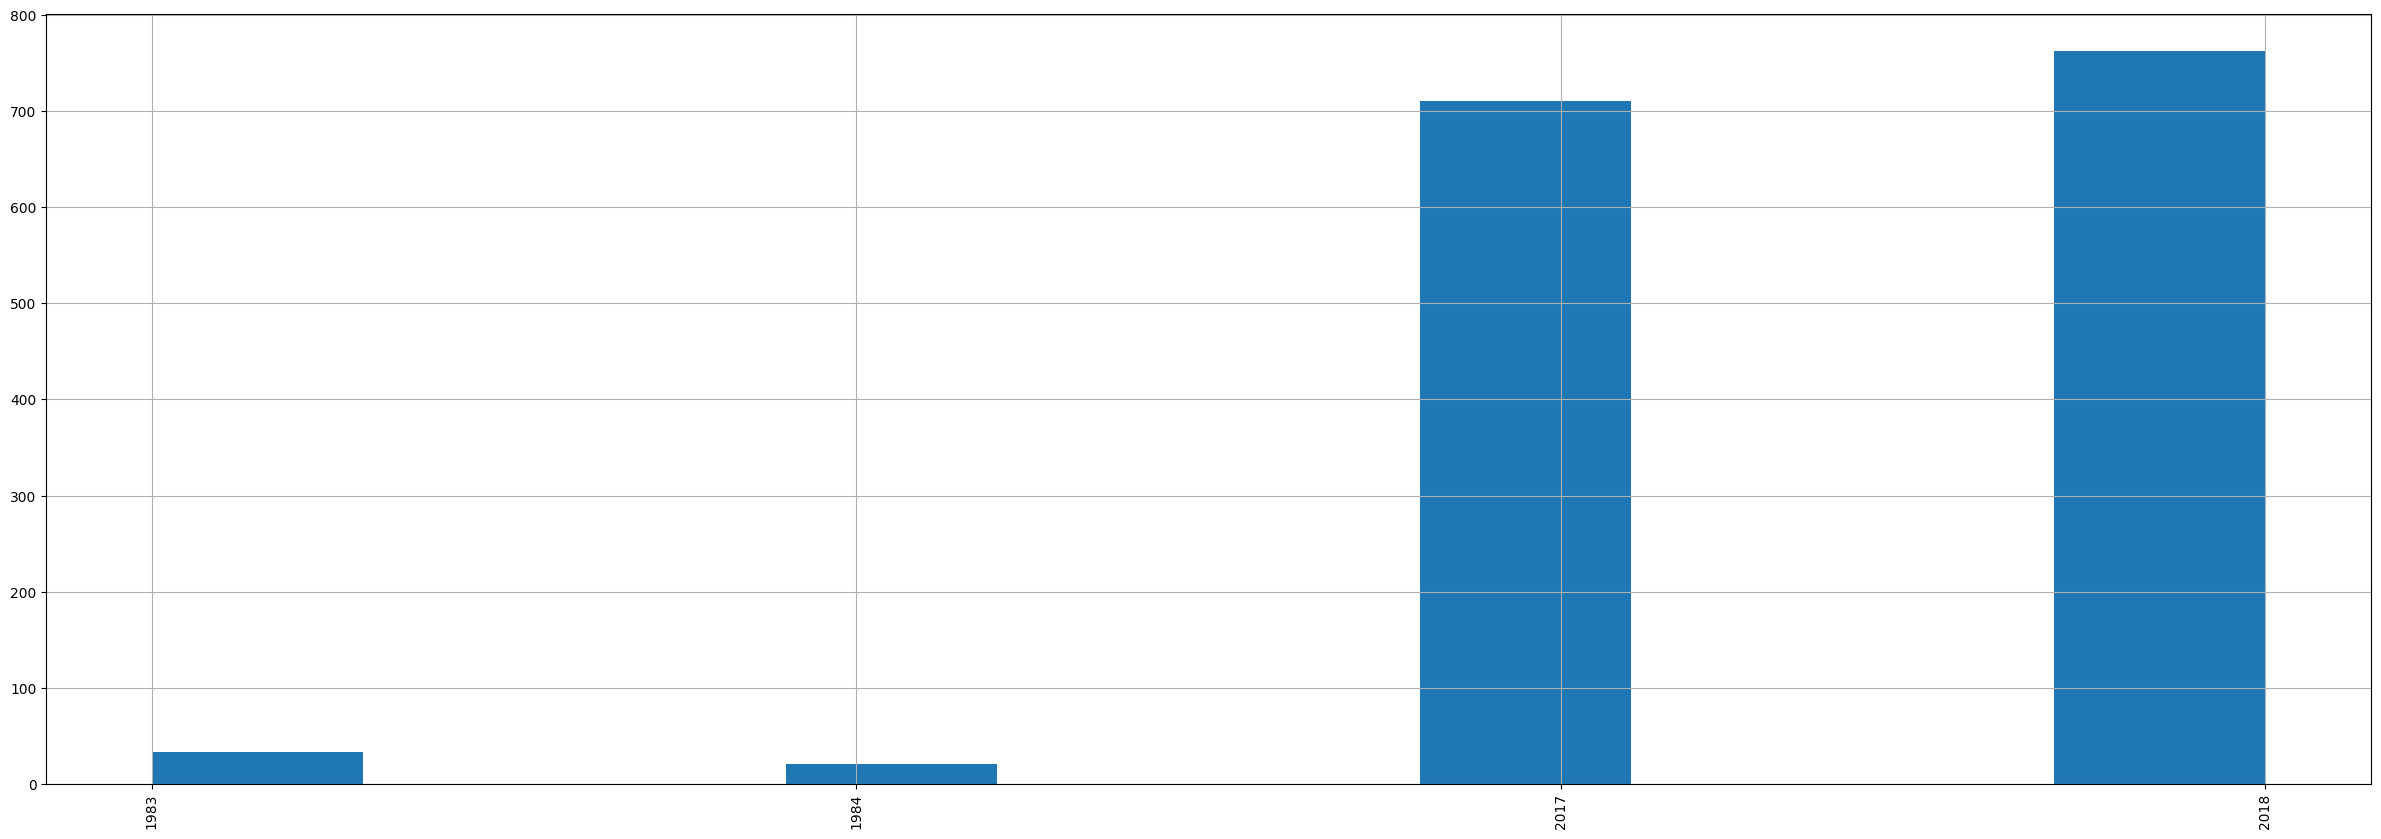

In [11]:
meta_field = field_selector.value
print(f"Distribution by {meta_field}")
print(df[meta_field].value_counts())
df[meta_field].sort_values().hist(xrot=90, figsize=(30,10))

In [12]:
print("Metadatas in collection (value, count) pairs")
stats = db.get_metadata_stats(collection, include_only=["date", "year", "issue"])
for field, val_dict in stats.items():
    print(f"\n----- {field} -----")
    print(sorted(val_dict.items(), key= lambda x: - x[1]))

Metadatas in collection (value, count) pairs

----- date -----
[('2017-09-26', 58), ('2017-12-06', 56), ('2018-11-08', 42), ('2017-12-07', 36), ('2018-02-14', 31), ('2017-06-01', 31), ('2017-06-28', 30), ('2017-12-14', 26), ('2018-10-31', 25), ('2018-05-17', 24), ('2018-06-13', 22), ('2018-06-14', 22), ('2018-11-06', 21), ('2018-03-07', 21), ('2017-01-31', 21), ('2018-02-22', 20), ('2018-10-10', 19), ('2017-09-07', 19), ('2017-02-07', 19), ('2018-06-26', 19), ('2018-11-07', 18), ('2017-11-23', 18), ('2018-03-08', 17), ('2017-06-27', 17), ('2017-05-16', 17), ('2017-12-13', 17), ('2018-10-30', 17), ('2017-11-08', 16), ('2018-01-25', 16), ('2017-11-01', 16), ('2018-05-15', 16), ('2018-03-06', 15), ('2018-01-16', 15), ('2018-11-20', 15), ('2018-09-19', 14), ('2017-11-22', 13), ('2017-11-28', 12), ('2017-01-25', 12), ('2017-02-09', 12), ('2018-02-01', 12), ('2018-02-20', 12), ('2017-05-31', 12), ('2017-11-29', 12), ('2017-04-20', 12), ('2018-04-12', 11), ('2018-11-21', 11), ('2017-12-19', 1